## To visualize modeling learned sequence preference as sequence logo using logomaker

python 3 codes  
jupyter=1.0.0; pandas=1.1.5; matplotlib=3.3.1; numpy=1.19.4; ipython=7.19.0; logomaker=0.8;

In [2]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# For showing images
from IPython.display import Image

# Import Logomaker
import logomaker

### Sequence logos of learned sequence preference (centered additive parameter values)

In [3]:
# Load additive parameter values of the final model, generated by <2-LR.R>
mtx_folder = '/Users/xxxx/Documents/Txn/3-TSS_sequence_library/12-modeling/2-LR-ct4/2-LR_lg9i1-para/'
pol = 'WT'
mtx_name = "LR_lg9i1-"+pol+"-para_idv.csv"

LR_coef = pd.read_csv(mtx_folder+mtx_name, index_col=0)
LR_coef['A']=0
LR_coef.loc['n6'] = 0 # n6 and n5 positions are not selected for final model, but want to leave space for them
LR_coef.loc['n5'] = 0

pos_order = ['n9','n8','n7','n6','n5','n4','n3','n2','n1','p1','p2']
LR_coef = LR_coef.loc[pos_order,:].reset_index()
LR_coef

,pos,C,G,T,A
0,n9,-0.238091,-0.566161,-0.489871,0
1,n8,-0.821951,-0.487891,-0.879199,0
2,n7,-0.142544,0.185490,-0.351019,0
3,n6,0.000000,0.000000,0.000000,0
4,n5,0.000000,0.000000,0.000000,0
5,n4,0.292513,-0.049600,-0.603165,0
6,n3,-0.317507,0.405666,-0.707979,0
7,n2,0.827219,0.620393,-0.065302,0
8,n1,3.001703,0.138367,2.295301,0
9,p1,-3.739246,-0.152348,-4.274104,0


In [4]:
# to center additive parameter values
LR_coef_center = logomaker.transform_matrix(LR_coef[['A','G','C','T']], center_values=True)
LR_coef_center

,A,C,G,T
pos,,,,
0,0.323531,0.085440,-0.242631,-0.166340
1,0.547260,-0.274691,0.059369,-0.331939
2,0.077018,-0.065526,0.262508,-0.274001
3,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000
5,0.090063,0.382576,0.040463,-0.513102
6,0.154955,-0.162552,0.560621,-0.553024
7,-0.345577,0.481641,0.274815,-0.410879
8,-1.358843,1.642860,-1.220476,0.936458


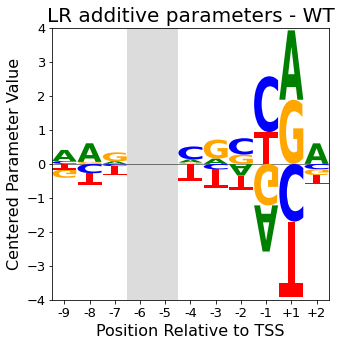

In [5]:
pos_label = ['-9','-8','-7','-6','-5','-4','-3','-2','-1','+1','+2']

fig, ax = plt.subplots(1,1, figsize=[9/20*len(pos_label),5])
logo = logomaker.Logo(LR_coef_center, ax=ax)
ax.set_title('LR additive parameters - '+pol, fontsize=20)
ax.set_ylabel("Centered Parameter Value", fontsize=16)
ax.set_xlabel("Position Relative to TSS", fontsize=16)
ax.set_ylim(-4, 4)
ax.yaxis.set_tick_params(labelsize=13)
ax.set_xticks(range(0,len(pos_label)))
ax.set_xticklabels(pos_label, fontsize=13)

logo.highlight_position_range(pmin=3, pmax=4, color='gainsboro') # to add shadow to -6 & -5, which are not included in model
#plt.savefig((mtx_folder+mtx_name).replace(".csv",".pdf"))

### Sequence logos of learned additive sequence preference plus interactions  
Specifically, learned sequence preference at -8 when different bases at -9

In [6]:
# Load sequence logo values (= centered(-8 coef + -9/-8 interaction)), generated by <6-lib_fig.R>
mtx_folder = '/Users/xxxx/Documents/Txn/3-TSS_sequence_library/12-modeling/2-LR-ct4/2-LR_lg9i1-para/'
pol = 'WT'
mtx_name = "LR_lg9i1-"+pol+"-n8para_under_n9.csv"

LR_itr_coef = pd.read_csv(mtx_folder+mtx_name, index_col=0)\
                .loc[['n9A','n9G','n9C','n9T'],:].reset_index()[['n8A','n8G','n8C','n8T']]\
                .rename(columns={'n8A':'A', 'n8G':'G', 'n8C':'C', 'n8T':'T'}, inplace=False)
LR_itr_coef

,A,G,C,T
0,0.547260,0.059369,-0.274691,-0.331939
1,1.126726,-0.224691,-0.362491,-0.539544
2,1.412100,-0.428641,-0.393922,-0.589537
3,1.495989,-0.044092,-0.289862,-1.162035


[Text(0, 0, '-9A'), Text(1, 0, '-9G'), Text(2, 0, '-9C'), Text(3, 0, '-9T')]

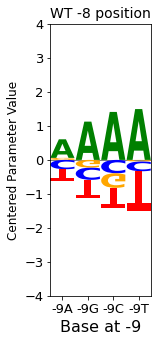

In [7]:
pos_label = ['-9A', '-9G', '-9C', '-9T']

fig, ax = plt.subplots(1,1, figsize=[9/20*len(pos_label),5])
logo = logomaker.Logo(LR_itr_coef, ax=ax)
ax.set_title(pol+' -8 position', fontsize=14)
ax.set_ylabel("Centered Parameter Value", fontsize=12)
ax.set_xlabel('Base at -9', fontsize=16)
ax.set_ylim(-4, 4)
ax.yaxis.set_tick_params(labelsize=13)
ax.set_xticks(range(0,len(pos_label)))
ax.set_xticklabels(pos_label, fontsize=13)

#plt.savefig((mtx_folder+mtx_name).replace(".csv",".pdf"))